In [22]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from itertools import product
import itertools
import numpy as np
import seaborn as sns 

In [2]:
df = pd.read_csv(r"C:\Users\spostma2\OneDrive - Louwman\Documents\School\EMM\cleaned_london_crime_temporal.csv")

In [36]:
df_clean = pd.read_csv(r"C:\Users\spostma2\OneDrive - Louwman\Documents\School\EMM\london_crime_enriched.csv")

In [37]:
df_clean

,LSOA Code,LSOA Name,Borough,Month,ARSON AND CRIMINAL DAMAGE,BURGLARY,DRUG OFFENCES,MISCELLANEOUS CRIMES AGAINST SOCIETY,POSSESSION OF WEAPONS,PUBLIC ORDER OFFENCES,ROBBERY,THEFT,VEHICLE OFFENCES,VIOLENCE AGAINST THE PERSON,Year,Median age mid-year,Male Population,Female Population,Total Population
0,E01000006,Barking and Dagenham 016A,Barking and Dagenham,01/04/2010,1,3,1,0,0,0,2,2,2,3,2010,NaN,88520.0,94318.0,182838.0
1,E01000006,Barking and Dagenham 016A,Barking and Dagenham,01/05/2010,3,0,3,0,0,0,0,1,0,2,2010,NaN,88520.0,94318.0,182838.0
2,E01000006,Barking and Dagenham 016A,Barking and Dagenham,01/06/2010,0,1,0,0,0,0,0,0,1,0,2010,NaN,88520.0,94318.0,182838.0
3,E01000006,Barking and Dagenham 016A,Barking and Dagenham,01/07/2010,2,1,0,0,0,0,0,1,3,4,2010,NaN,88520.0,94318.0,182838.0
4,E01000006,Barking and Dagenham 016A,Barking and Dagenham,01/08/2010,0,1,1,0,0,0,0,1,2,2,2010,NaN,88520.0,94318.0,182838.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758171,E01035722,Westminster 024G,Westminster,01/07/2022,0,0,1,0,0,2,1,3,2,5,2022,35.9,NaN,NaN,NaN
758172,E01035722,Westminster 024G,Westminster,01/08/2022,0,3,2,0,0,0,0,5,0,4,2022,35.9,NaN,NaN,NaN
758173,E01035722,Westminster 024G,Westminster,01/09/2022,0,1,0,0,0,0,0,6,3,2,2022,35.9,NaN,NaN,NaN
758174,E01035722,Westminster 024G,Westminster,01/10/2022,1,4,0,0,0,0,0,6,2,4,2022,35.9,NaN,NaN,NaN


In [29]:
df_numerical = df.drop(['LSOA Code', 'LSOA Name', 'Borough', 'Month'], axis=1)

In [30]:
df_numerical

,ARSON AND CRIMINAL DAMAGE,BURGLARY,DRUG OFFENCES,MISCELLANEOUS CRIMES AGAINST SOCIETY,POSSESSION OF WEAPONS,PUBLIC ORDER OFFENCES,ROBBERY,THEFT,VEHICLE OFFENCES,VIOLENCE AGAINST THE PERSON
0,1,3,1,0,0,0,2,2,2,3
1,3,0,3,0,0,0,0,1,0,2
2,0,1,0,0,0,0,0,0,1,0
3,2,1,0,0,0,0,0,1,3,4
4,0,1,1,0,0,0,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...
758171,0,0,1,0,0,2,1,3,2,5
758172,0,3,2,0,0,0,0,5,0,4
758173,0,1,0,0,0,0,0,6,3,2
758174,1,4,0,0,0,0,0,6,2,4


In [ ]:
df_parsed = pd.read_csv(r"C:\Users\spostma2\OneDrive - Louwman\Documents\School\EMM\cleaned_london_crime_temporal.csv", parse_dates=['Month'])
#df_grouped = df_parsed.groupby('Borough')

In [15]:
df_parsed

,LSOA Code,LSOA Name,Borough,Month,ARSON AND CRIMINAL DAMAGE,BURGLARY,DRUG OFFENCES,MISCELLANEOUS CRIMES AGAINST SOCIETY,POSSESSION OF WEAPONS,PUBLIC ORDER OFFENCES,ROBBERY,THEFT,VEHICLE OFFENCES,VIOLENCE AGAINST THE PERSON
0,E01000006,Barking and Dagenham 016A,E09000002,2010-04-01,1,3,1,0,0,0,2,2,2,3
1,E01000006,Barking and Dagenham 016A,E09000002,2010-05-01,3,0,3,0,0,0,0,1,0,2
2,E01000006,Barking and Dagenham 016A,E09000002,2010-06-01,0,1,0,0,0,0,0,0,1,0
3,E01000006,Barking and Dagenham 016A,E09000002,2010-07-01,2,1,0,0,0,0,0,1,3,4
4,E01000006,Barking and Dagenham 016A,E09000002,2010-08-01,0,1,1,0,0,0,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758171,E01035722,Westminster 024G,E09000033,2022-07-01,0,0,1,0,0,2,1,3,2,5
758172,E01035722,Westminster 024G,E09000033,2022-08-01,0,3,2,0,0,0,0,5,0,4
758173,E01035722,Westminster 024G,E09000033,2022-09-01,0,1,0,0,0,0,0,6,3,2
758174,E01035722,Westminster 024G,E09000033,2022-10-01,1,4,0,0,0,0,0,6,2,4


In [ ]:
X_global = sm.add_constant(df_parsed['THEFT'])
y_global = df_parsed['VIOLENCE AGAINST THE PERSON']

global_model = sm.OLS(y_global, X_global).fit()
subgroups = df_parsed.groupby('Borough')

results = []

for name, group in subgroups:
    if len(group) < 5:
        continue;  
#blijkbaar zijn deze subgroups te klein om statistisch significant te zijn

    X_sub = sm.add_constant(group['THEFT'])
    y_sub = group['VIOLENCE AGAINST THE PERSON']

    local_model = sm.OLS(y_sub, X_sub).fit()
    deviation = abs(local_model.params['THEFT'] - global_model.params['THEFT'])
    results.append({
        'Subgroup': name,
        'Deviation': deviation,
        'Local_slope': local_model.params['THEFT'],
        'Global_slope': global_model.params['THEFT'],
        'N': len(group)
    })

results_df = pd.DataFrame(results).sort_values('Deviation', ascending=False)
print(results_df.head())



     Subgroup  Deviation  Local_slope  Global_slope      N
3   E09000005   0.215032     0.373394      0.158363  27512
2   E09000004   0.210068     0.368431      0.158363  22496
27  E09000029   0.209679     0.368042      0.158363  18696
14  E09000016   0.204100     0.362463      0.158363  23256
6   E09000008   0.202321     0.360684      0.158363  34808


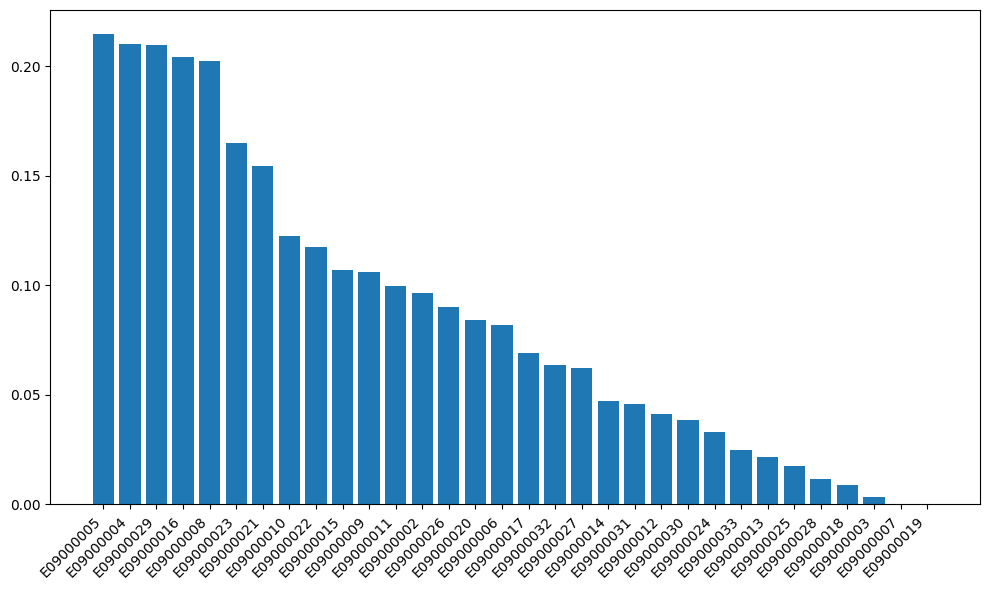

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(results_df['Subgroup'], results_df['Deviation'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


                                           Subgroup   Deviation  Size  \
0  {'Borough': 'E09000021', 'YearMonth': '2013-03'}  101.300626    99   
1  {'Borough': 'E09000021', 'YearMonth': '2014-01'}   91.133962    99   
2  {'Borough': 'E09000021', 'YearMonth': '2012-12'}   89.301029    99   
3  {'Borough': 'E09000033', 'YearMonth': '2021-11'}   43.679989   123   
4  {'Borough': 'E09000021', 'YearMonth': '2011-02'}   36.548002    99   
5  {'Borough': 'E09000027', 'YearMonth': '2013-04'}   33.964340   115   
6  {'Borough': 'E09000033', 'YearMonth': '2021-09'}   33.280362   123   
7  {'Borough': 'E09000021', 'YearMonth': '2014-06'}   33.164272    99   
8  {'Borough': 'E09000033', 'YearMonth': '2010-12'}   31.678850   123   
9  {'Borough': 'E09000033', 'YearMonth': '2021-10'}   29.508586   123   

   Local_R2  Global_R2  
0  0.977214   0.576492  
1  0.982880   0.576492  
2  0.983927   0.576492  
3  0.837147   0.576492  
4  0.987320   0.576492  
5  0.812384   0.576492  
6  0.917598   0.57649

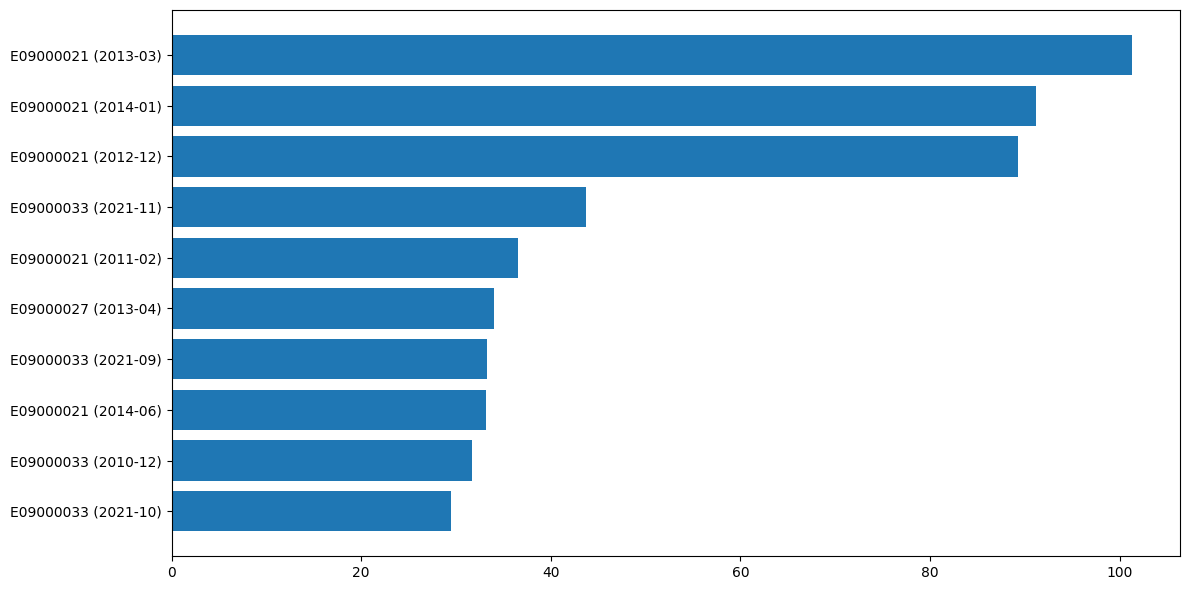

In [35]:
results = []
subgroups = []

predictor_cols = ["ARSON AND CRIMINAL DAMAGE","BURGLARY","DRUG OFFENCES","MISCELLANEOUS CRIMES AGAINST SOCIETY","POSSESSION OF WEAPONS",
    "PUBLIC ORDER OFFENCES","ROBBERY","VIOLENCE AGAINST THE PERSON","VEHICLE OFFENCES"
]
target_col = "THEFT"
data = df_parsed.dropna(subset=predictor_cols + [target_col])

X_global = sm.add_constant(data[predictor_cols])
y_global = data[target_col]

global_model = sm.OLS(y_global, X_global).fit()
global_params = global_model.params
data["YearMonth"] = data["Month"].dt.to_period("M").astype(str)

categorical_features = ["Borough", "YearMonth"]
values_dict = {feat: data[feat].unique() for feat in categorical_features}

for combo in itertools.product(*values_dict.values()):
    mask = np.ones(len(data), dtype=bool)
    description = {}
    for feat, val in zip(categorical_features, combo):
        mask &= data[feat] == val
        description[feat] = val
    if mask.sum() >= 5:
        subgroups.append((description, mask))

for desc, mask in subgroups:
    subgroup = data.loc[mask]

    X_local = sm.add_constant(subgroup[predictor_cols])
    y_local = subgroup[target_col]

    try:
        local_model = sm.OLS(y_local, X_local).fit()
        local_params = local_model.params
        deviation = np.linalg.norm(local_params - global_params)

        results.append({
            "Subgroup": desc,
            "Deviation": deviation,
            "Size": len(subgroup),
            "Local_R2": local_model.rsquared,
            "Global_R2": global_model.rsquared,
        })

    except Exception:
        continue;

results_df = pd.DataFrame(results)
results_df = results_df.sort_values("Deviation", ascending=False).reset_index(drop=True)
print(results_df.head(10))

top_n = 10
plt.figure(figsize=(12, 6))
labels = [f"{r['Subgroup']['Borough']} ({r['Subgroup']['YearMonth']})" for _, r in results_df.head(top_n).iterrows()]
plt.barh(labels, results_df["Deviation"].head(top_n))
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


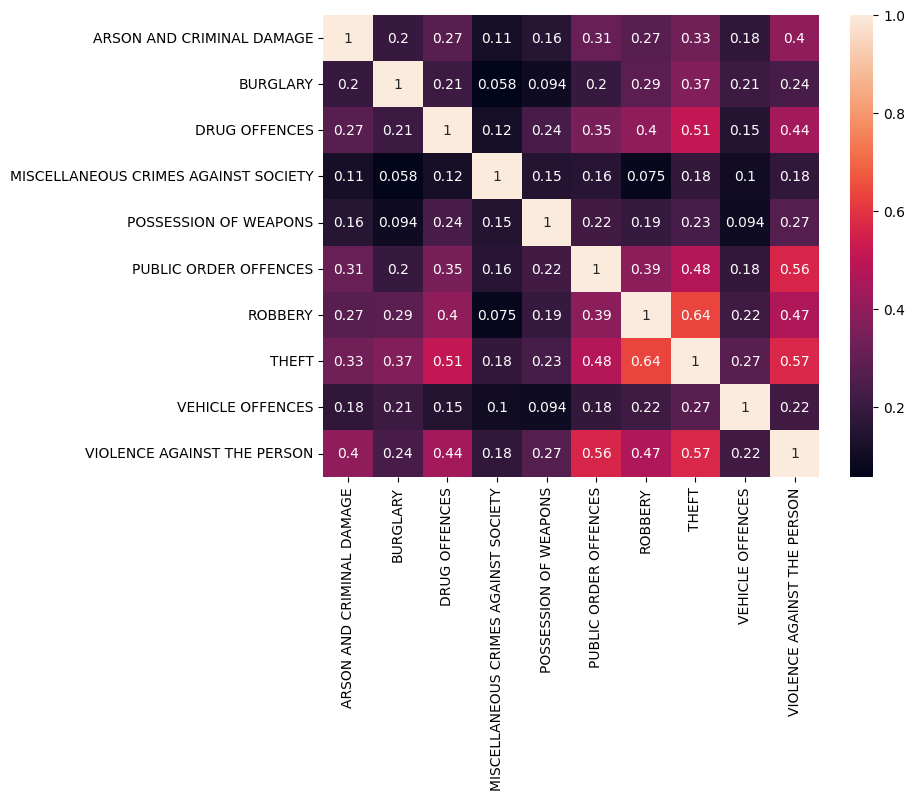

In [33]:
matrix = df_numerical.corr()

plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True)
plt.show()

In [34]:
matrix

,ARSON AND CRIMINAL DAMAGE,BURGLARY,DRUG OFFENCES,MISCELLANEOUS CRIMES AGAINST SOCIETY,POSSESSION OF WEAPONS,PUBLIC ORDER OFFENCES,ROBBERY,THEFT,VEHICLE OFFENCES,VIOLENCE AGAINST THE PERSON
ARSON AND CRIMINAL DAMAGE,1.000000,0.195137,0.273485,0.113869,0.155612,0.308539,0.273121,0.332523,0.178557,0.398047
BURGLARY,0.195137,1.000000,0.205256,0.057782,0.093813,0.196241,0.285871,0.369118,0.205149,0.236587
DRUG OFFENCES,0.273485,0.205256,1.000000,0.115011,0.235782,0.347299,0.397210,0.509419,0.147557,0.441867
MISCELLANEOUS CRIMES AGAINST SOCIETY,0.113869,0.057782,0.115011,1.000000,0.149638,0.157951,0.075137,0.183882,0.101439,0.182220
POSSESSION OF WEAPONS,0.155612,0.093813,0.235782,0.149638,1.000000,0.220769,0.191240,0.232010,0.094363,0.265738
PUBLIC ORDER OFFENCES,0.308539,0.196241,0.347299,0.157951,0.220769,1.000000,0.386044,0.480908,0.184715,0.562363
ROBBERY,0.273121,0.285871,0.397210,0.075137,0.191240,0.386044,1.000000,0.635067,0.215526,0.465013
THEFT,0.332523,0.369118,0.509419,0.183882,0.232010,0.480908,0.635067,1.000000,0.274978,0.566608
VEHICLE OFFENCES,0.178557,0.205149,0.147557,0.101439,0.094363,0.184715,0.215526,0.274978,1.000000,0.222819
VIOLENCE AGAINST THE PERSON,0.398047,0.236587,0.441867,0.182220,0.265738,0.562363,0.465013,0.566608,0.222819,1.000000
